In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parsasam/captcha-dataset")

print("Path to dataset files:", path)

100%|██████████| 356M/356M [00:08<00:00, 41.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/parsasam/captcha-dataset/versions/1


['RxTMx', 'lPVB4', 'qwPFP', 'WyMpE', 'BcUWp', '16sNA', 'uHpEK', 'RsilL', 'P2bFs', '3dIQf', 'Pi1Pv', 'jYHZT', 'uYA3B']


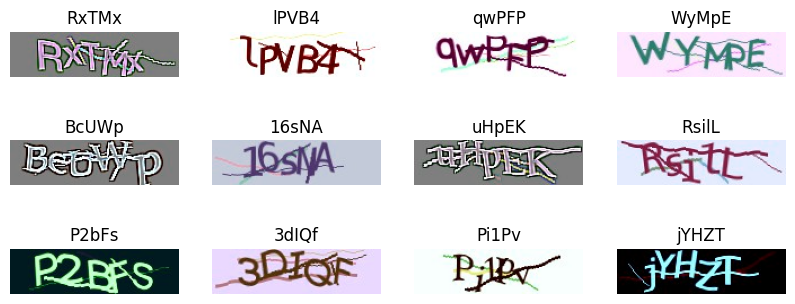

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
loaded_images = []
image_labels = []


# load images
for i, filename in enumerate(glob.glob(f'{path}/*.jpg')):
  loaded_images.append(cv2.imread(filename))
  image_labels.append(filename.split('/')[-1].split('.')[0])
  if i==12:
    break

print(image_labels)
fig, axes = plt.subplots(3, 4, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(loaded_images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

['RxTMx', 'lPVB4', 'qwPFP', 'WyMpE', 'BcUWp', '16sNA', 'uHpEK', 'RsilL', 'P2bFs', '3dIQf', 'Pi1Pv', 'jYHZT', 'uYA3B']


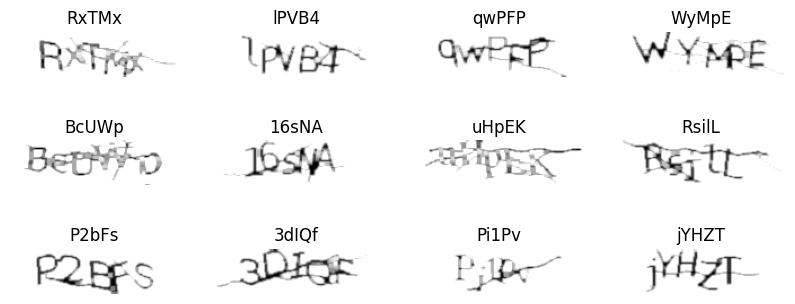

In [ ]:
# Process
images = []
for image in loaded_images:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  ret,image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

  # if the background is black, invert it
  if image[0][0] == 0:
    image = cv2.bitwise_not(image)

  # all non-white pixels are now black
  for i, row in enumerate(image):
    for j, pixel in enumerate(row):
      if pixel != 255:
        image[i][j] = 0

  image = cv2.GaussianBlur(image, (3,3), 0)

  image = cv2.dilate(image.copy(), None, 1)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

  images.append(image)


# output and graph
print(image_labels)
fig, axes = plt.subplots(3, 4, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')